

# **Lista 02 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff


---



### Bibliotecas necessárias para compilação da Lista 02

In [1]:
import os 
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

A função abaixo foi criada para facilitar a impressão de imagens na tela

In [3]:
def printImage(path1, title1, title2='', path2='', figsize=(8, 12)):
    image1 = cv2.imread(path1)
    
    if path2 != '':
        image2 = cv2.imread(path2)
        
        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
        ax1.imshow(image1)
        ax1.axis('off')
        ax1.set_title(title1)
        
        ax2.imshow(image2)
        ax2.axis('off')
        ax2.set_title(title2)
        
        fig.tight_layout()
    else:
        plt.imshow(image1)
        plt.title(title1)
        plt.axis('off')
        
    plt.show()

## **Problema 1**: Equalização
Para esta questão, baixe as três imagens baixo, utilizando-as como originais para os problemas a seguir.
- [coluna](https://drive.google.com/file/d/1Qs1ZHzIs1RQqvMapyEF8XWGDc9clfOjH/view?usp=sharing)
- [sementes](https://drive.google.com/file/d/1xgsh-pzL43w5c6mV1qdf0MjGs_TP6UW-/view?usp=sharing)
- [lua](https://drive.google.com/file/d/1mgbxFlgWnDoNAWocSyNaOp9SioqdLC5R/view?usp=sharing)

Para resolver a questão, não utilize  funções prontas do Python para realizar a equalização das imagens, como por exemplo a função equalizeHist do OpenCV. 


### Rodar código para criação de diretórios
A criação de diretórios foi pensada para organizar a criação de imagens de cada questão

In [4]:
def criarDiretorio(directory):
    parent_dir = "."

    path = os.path.join(parent_dir, directory) 
    os.mkdir(path) 
    print("Diretório '% s' foi criado" % directory) 


**1.1.** 

> Calcule os histogramas das imagens originais. 

> Implemente um algoritmo de equalização utilizando uma abordagem global, ou seja, uma abordagem baseada no histograma da imagem completa. Aplique o método de equalização global de histogramas para as duas imagens originais. 

> Imprima as imagens originais, as imagens equalizadas e os seus respectivos histogramas. 




In [5]:
try:
    criarDiretorio("Questao1_1")
except:
    print('Diretório já foi criado')

Diretório já foi criado


In [6]:
def getFreqDictImage(path):
    img = cv2.imread(path, 0)
    width, height = img.shape
    
    prob_freq = np.zeros(256)
    
    ## Pre popular dicionario de frequencia 
    freq = dict()
    for i in range(256):
        freq[i] = 0
    
    ## Encontrar histograma
    for i in range(width):
        for j in range(height):
            value = img[i,j]
            freq[value] += 1
            
    return freq

In [7]:
def equalizeHistME(path, save_path, plotPDF, plotHistogramEqualization):
    img = cv2.imread(path, 0)
    width, height = img.shape
    
    DISC_INTENSITY_LEVEL = 256
    
    prob_cumulative = np.zeros(DISC_INTENSITY_LEVEL)
    cumulative = np.zeros(DISC_INTENSITY_LEVEL)
    output = np.zeros(DISC_INTENSITY_LEVEL)
    prob_freq = np.zeros(DISC_INTENSITY_LEVEL)
    sum = 0
    freq = getFreqDictImage(path)
    
    print("Shape da imagem original: {}".format(img.shape))
    print('Altura = ', height, 'Comprimento = ', width)
    num_of_pixels = height*width
    print("Quantidade de pixels na imagem: {}".format(num_of_pixels))
    
    img_hand_equ = np.zeros(shape=(width, height), dtype='uint8')
    print("Shape da imagem criada: {}".format(img_hand_equ.shape))
    
    for key, value in freq.items(): 
        prob_freq[key] = value/num_of_pixels

    if(plotPDF == "Sim"):
        plt.stem(range(0, 256), prob_freq, use_line_collection=True);
        plt.title('Probability Distribution Function')
        plt.show()
    
    for i in range(DISC_INTENSITY_LEVEL):
        sum = sum + freq[i]
        cumulative[i] = sum
        prob_cumulative[i] = cumulative[i]/num_of_pixels
        output[i] = round(prob_cumulative[i]*255)
    
    if(plotHistogramEqualization == "Sim"):
        plt.stem(range(0, DISC_INTENSITY_LEVEL), output, use_line_collection=True);
        plt.title('Histogram Equalization')
        plt.show()
        
    for i in range(width):
        for j in range(height):
            img_hand_equ[i, j] = output[img[i, j]]
    
    if save_path != "Não":
        cv2.imwrite(save_path,img_hand_equ) 
    return img_hand_equ

In [8]:
img_hist_equ_coluna = equalizeHistME('./fig_2.png', './Questao1_1/coluna_equalizada.png', 
                                       "Não", "Não")

Shape da imagem original: (488, 373)
Altura =  373 Comprimento =  488
Quantidade de pixels na imagem: 182024
Shape da imagem criada: (488, 373)


In [9]:
img_hist_equ_sementes = equalizeHistME('./fig_1.png', './Questao1_1/semente_equalizada.png', 
                                       "Não", "Não")

Shape da imagem original: (500, 500)
Altura =  500 Comprimento =  500
Quantidade de pixels na imagem: 250000
Shape da imagem criada: (500, 500)


In [10]:
img_hist_equ_lua = equalizeHistME('./lua.tif', './Questao1_1/lua_equalizada.png', 
                                       "Não", "Não")

Shape da imagem original: (540, 466)
Altura =  466 Comprimento =  540
Quantidade de pixels na imagem: 251640
Shape da imagem criada: (540, 466)


### Comparação de resultados

Pode-se criar uma imagem com três divisões. O primeiro quadrante é a imagem obtida com o método criado na mão acima. O segundo quadrante é a imagem inicial. E a terceira imagem é a imagem obtida com o método do próprio opencv

In [11]:
def generateThreeInOneImage():
    ####### Coluna #######
    img = cv2.imread('fig_2.png', 0)

    ## Imagem utilizando o método do próprio openCV
    equ = cv2.equalizeHist(img)
    cv2.imwrite('./Questao1_1/coluna_equalizada_opencv.png',equ) 

    ## Compilação das 3 imagens
    res = np.hstack((img_hist_equ_coluna, img, equ))
    cv2.imwrite('./Questao1_1/coluna_equalizada_opencv_juntas.png',res) 
    
    ####### Semente #######
    img = cv2.imread('fig_1.png', 0)

    ## Imagem utilizando o método do próprio openCV
    equ = cv2.equalizeHist(img)
    cv2.imwrite('./Questao1_1/semente_equalizada_opencv.png',equ) 
    
    ## Compilação das 3 imagens
    res = np.hstack((img_hist_equ_sementes, img, equ))
    cv2.imwrite('./Questao1_1/semente_equalizada_opencv_juntas.png',res) 
    
    ####### Lua #######
    img = cv2.imread('Lua.tif', 0)

    ## Imagem utilizando o método do próprio openCV
    equ = cv2.equalizeHist(img)
    cv2.imwrite('./Questao1_1/lua_equalizada_opencv.png',equ) 

    ## Compilação das 3 imagens
    res = np.hstack((img_hist_equ_lua, img, equ))
    cv2.imwrite('./Questao1_1/lua_equalizada_opencv_juntas.png',res) 
generateThreeInOneImage()

**1.2** 

> Implemente um algoritmo de equalização que utilize uma abordagem baseada em histogramas locais. Ou seja, ao invés de aplicar o procedimento de equalização sobre a imagem completa, aplique-o sobre pequenas áreas da imagem (subimagens). 

> Aplique o método nas duas imagens originais, considerando áreas de 5x5 e 7x7 pixels. 

> Imprima as imagens originais, as imagens equalizadas e seus respectivos histogramas. Comente os resultados obtidos, comparando-os com
os resultados obtidos anteriormente.



In [12]:
try:
    criarDiretorio("Questao1_2")
except:
    print('Diretório já foi criado')

Diretório já foi criado


In [13]:
def localEqualizeHistME(path, save_path, M, N):
    img = cv2.imread(path, 0)
    width, height = img.shape
    
    DISC_INTENSITY_LEVEL = 256
    img_hand_equ = np.zeros(shape=(width, height), dtype='uint8')
    
    mid_val=round((M*N)/2)
    
    ## Find the number of rows and columns to be padded with zero
    in_ = -1
    for i in range(M):
        for j in range(N):
            in_ += 1
            if(in_ == mid_val):
                PadM = i
                PadN = j
                break
    
    print('PadM: ', PadM)
    print('PadN: ', PadN)
    
    ## Padding the image with zero on all sides
    B = np.pad(img, [PadM, PadN])
    print(B.shape)
    print('len(B[0]) - (PadM*2) = ', B.shape[0] - (PadM*2))
    print('len(B[1]) - (PadN*2) = ', B.shape[1] - (PadN*2))
    
    for i in range(len(B[0]) - (PadM*2)):
        for j in range(len(B[1]) - (PadN*2)):
            cdf = np.zeros(DISC_INTENSITY_LEVEL)
            inc = 0
            for x in range(M):
                for y in range(N):
                    
                    # É preciso encontrar o elemento do meio
                    if(inc == mid_val):
                        ele = B[i+x, j+y]
                        
                    pos = B[i+x, j+y]
                    cdf[pos] = cdf[pos]+1
                    
                    inc+=1
                    
            for l in range(1, DISC_INTENSITY_LEVEL):
                cdf[l] = cdf[l] + cdf[l-1]
                
            img_hand_equ[i,j] = round((cdf[ele]/(M*N))*255)
        
    cv2.imwrite(save_path, img_hand_equ) 
    return img_hand_equ

#### Semente

Janela de 5x5 e em seguida 7x7

In [14]:
localEqualizeHistME('./fig_1.png', './Questao1_2/semente_equalizada_5x5.png', 5, 5)

PadM:  2
PadN:  2
(504, 504)
len(B[0]) - (PadM*2) =  500
len(B[1]) - (PadN*2) =  500


array([[255, 255, 255, ..., 255, 255, 214],
       [255, 255, 255, ..., 224, 235, 204],
       [255, 255, 255, ..., 153, 173, 173],
       ...,
       [235, 173,  20, ..., 194, 153, 194],
       [245, 204, 184, ..., 163, 184, 153],
       [255, 224, 204, ..., 163, 184, 173]], dtype=uint8)

In [15]:
localEqualizeHistME('./fig_1.png', './Questao1_2/semente_equalizada_7x7.png', 7, 7)

PadM:  3
PadN:  3
(506, 506)
len(B[0]) - (PadM*2) =  500
len(B[1]) - (PadN*2) =  500


array([[255, 255, 255, ..., 255, 255, 229],
       [255, 255, 255, ..., 239, 239, 224],
       [255, 255, 255, ..., 203, 203, 203],
       ...,
       [245, 208,  83, ..., 213, 172, 193],
       [250, 224, 213, ..., 172, 187, 161],
       [255, 239, 219, ..., 161, 182, 177]], dtype=uint8)

#### Lua

Janela de 5x5 e em seguida 7x7

In [16]:
localEqualizeHistME('./lua.tif', './Questao1_2/lua_equalizada_5x5.png', 5, 5)

PadM:  2
PadN:  2
(544, 470)
len(B[0]) - (PadM*2) =  540
len(B[1]) - (PadN*2) =  466


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [17]:
localEqualizeHistME('./lua.tif', './Questao1_2/lua_equalizada_7x7.png', 7, 7)

PadM:  3
PadN:  3
(546, 472)
len(B[0]) - (PadM*2) =  540
len(B[1]) - (PadN*2) =  466


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

#### Coluna

Janela de 5x5 e em seguida 7x7

In [18]:
localEqualizeHistME('./fig_2.png', './Questao1_2/coluna_equalizada_5x5.png', 5, 5)

PadM:  2
PadN:  2
(492, 377)
len(B[0]) - (PadM*2) =  488
len(B[1]) - (PadN*2) =  373


array([[194, 255, 255, ..., 255, 255, 255],
       [163, 255, 255, ..., 255, 255, 143],
       [245, 235,  82, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [19]:
localEqualizeHistME('./fig_2.png', './Questao1_2/coluna_equalizada_7x7.png', 7, 7)

PadM:  3
PadN:  3
(494, 379)
len(B[0]) - (PadM*2) =  488
len(B[1]) - (PadN*2) =  373


array([[203, 255, 255, ..., 255, 255, 255],
       [182, 245, 245, ..., 255, 255, 172],
       [245, 245, 114, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

**1.3**

> Escreva um código que realize uma mapeamento de histogramas (*Histogram matching*) de duas imagens (apenas 1 canal de cor - tons de cinza). Para isto, o código deve utilizar a técnica de especificação de histogramas vista na aula, utilizando o histograma de uma das imagens como o histograma original e o histograma da outra imagem como o histograma especificado. 

> Teste seu código com vários pares de imagens (à sua escolha). Para um resultado mais satisfatório, uma das imagens deve ter a frequência das intensidades de tons dispersa (histograma espalhado), enquanto que a outra imagem deve possuir a frequência das intensidades de tons concentrada (histograma concentrado em uma região). Não utilize imagens
cujos tons tenham o intervalo de intensidades de tons reduzido. 


In [20]:
try:
    criarDiretorio("Questao1_3")
except:
    print('Diretório já foi criado')

Diretório já foi criado


In [21]:
def histogramMatching(path1, path2, save_path):
    img1 = cv2.imread(path1, 0)
    img2 = cv2.imread(path2, 0)
    
    DISC_INTENSITY_LEVEL = 256
    
    img_hist_1 = list(getFreqDictImage(path1).values())
    img_hist_2 = list(getFreqDictImage(path2).values())
    
    M = np.zeros(DISC_INTENSITY_LEVEL)
    cdf1 = np.cumsum(img_hist_1)/img1.size
    cdf2 = np.cumsum(img_hist_2)/img2.size
        
    for i in range(256):
        diff = abs(cdf1[i] - cdf2)
        smallest = min(diff)
        M[i] = np.where(diff == smallest)[0][0]
    
    out = M[img1]
    cv2.imwrite(save_path, out)

In [22]:
histogramMatching('./fig_1.png', './fig_2.png', 'Questao1_3/semente_coluna_matching.png') 
histogramMatching('./fig_2.png', './fig_1.png', 'Questao1_3/coluna_semente_matching.png') 
histogramMatching('./lena.bmp', './fig_2.png', 'Questao1_3/lena_coluna_matching.png') 

## **Problema 2**: Filtragem

Para esta questão, baixe as seguintes imagens de teste:
- [Barbara](https://homepages.cae.wisc.edu/~ece533/images/barbara.png)
- [Lena](https://homepages.cae.wisc.edu/~ece533/images/lena.bmp)
- [Zelda](https://homepages.cae.wisc.edu/~ece533/images/zelda.png)


**2.1**

> Escreva um programa que execute a filtragem espacial de uma imagem. O seu programa deve permitir que o usuário entre com os coeficientes e o tamanho (n × n, n é um número ı́mpar) da máscara espacial.




A filtragem espacial escolhida foi a `median filter`

In [23]:
try:
    criarDiretorio("Questao2_1")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_1/Barbara")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_1/Lena")
except:
    print('Diretório já foi criado')

try:
    criarDiretorio("./Questao2_1/Zelda")
except:
    print('Diretório já foi criado')

Diretório já foi criado
Diretório já foi criado
Diretório já foi criado
Diretório já foi criado


In [24]:
def medianFilter(path, N, name_folder):
    import math 
    from itertools import chain 
    
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    width, height = img.shape
    img_out = np.zeros(shape=(width, height), dtype='uint8')
    
    ## Como definido na questão, as janelas devem ser iguais
    M = N
    
    ## Colocar zeros na imagem
    modify_img = np.pad(img, [math.floor(M/2), math.floor(N/2)] )
    
    med_indx = round((M*N)/2);
    
    k = 0
    for i in range(len(modify_img)-M):
        for j in range(len(modify_img)-N):
            temp = modify_img[i:i+M-1, j:j+N-1]
            median = np.mean(temp, dtype=np.float32)
            img_out[i][j] = int(median)
            
    cv2.imwrite('./Questao2_1/{}/median_filter_{}x{}_{}.png'.format(
                                        name_folder, 
                                        N, N,
                                        path.split()[0][2:-4]), img_out) 
    return img_out

Barbara

In [25]:
name_folder = 'Barbara'
img_median_filter = medianFilter('./barbara.png', 5, name_folder)
img_median_filter = medianFilter('./barbara.png', 25, name_folder)

Zelda

In [26]:
name_folder = 'Zelda'
img_median_filter = medianFilter('./zelda.png', 5, name_folder)
img_median_filter = medianFilter('./zelda.png', 25, name_folder)

Lena

In [27]:
name_folder = 'Lena'
img_median_filter = medianFilter('./lena.bmp', 5, name_folder)
img_median_filter = medianFilter('./lena.bmp', 25, name_folder)

**2.2**

> Utilize o programa desenvolvido no item 2.1 para implementar a técnica de realce utilizando um filtro Laplaciano. Teste o seu programa utilizando as as imagens Barbara, Lena e Zelda. Imprima as imagens para visualização. 


In [28]:
try:
    criarDiretorio("Questao2_2")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_2/Barbara")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_2/Lena")
except:
    print('Diretório já foi criado')

try:
    criarDiretorio("./Questao2_2/Zelda")
except:
    print('Diretório já foi criado')

Diretório já foi criado
Diretório já foi criado
Diretório já foi criado
Diretório já foi criado


In [29]:
def laplacianFilter(path, kernel, name, name_folder):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    width, height = img.shape
    img_out = np.zeros(shape=(width, height), dtype='uint8')
    
    img_out_int = np.zeros(shape=(width, height), dtype='uint8')
    
    if kernel == 'a':
        lap_filter = np.array(
                      [[0, 1, 0], 
                      [1, -4, 1],
                      [0, 1, 0]]
        )
                     
    elif kernel == 'b':
        lap_filter = np.array(
                      [[1, 1, 1], 
                      [1, -8, 1],
                      [1, 1, 1]]
        )
    elif kernel == 'c':
        lap_filter = np.array(
                      [[0, -1, 0], 
                      [-1, 4, -1],
                      [0, -1, 0]]
        )
    elif kernel == 'd':
        lap_filter = np.array(
                      [[-1, -1, -1], 
                      [-1, 8, -1],
                      [-1, -1, -1]]
        )

    img = np.pad(img, [1, 1])
    for i in range(img.shape[0] - 2):
        for j in range(img.shape[1] - 2):
            res = sum(sum(lap_filter*img[i:i+3, j:j+3]))
            img_out[i, j] = res
            if res < 255 and res > 0:
                img_out_int[i, j] = res
    
    img_out_int = np.uint8(img_out_int)

    cv2.imwrite('./Questao2_2/{}/my_laplace_filter_{}_kernel_{}.png'.format(
                name_folder,
                name, kernel), 
                img_out_int)
    
    return img_out, img_out_int

In [30]:
def sharpenImage(path, kernel, name, name_folder):
    img = cv2.imread(path)
    img = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_out, img_out_int = laplacianFilter(path, kernel, name, name_folder)
    image_sharpened = img - img_out_int
    
    cv2.imwrite('./Questao2_2/{}/sharpened_{}_kernel_{}.png'.format(
                name_folder,
                name, kernel), 
                image_sharpened)
    return image_sharpened
    

A ideia foi chamar a função sharpenImage nas imagens originais e nas imagens alteradas da questão 2.1. A nomenclatura utilizada foi a seguinte. 

 - my_laplace_filter_nome_kernel_# --> Esse padrão foi utilizado para salvar imagens após aplicado o filtro de Laplace nas imagens originais. 
 
 - my_laplace_filter_nome_2_1_kernel_# --> Observe o <strong>2_1</strong> no nome. Esse padrão foi utilizado para salvar imagens após aplicado o filtro de Laplace nas imagens obtidas da questão 2.1
 
 - sharpened_nome_kernel_# --> Esse padrão foi utilizado para salvar imagens após aplicado realce nas imagens originais
 
 - sharpened_nome_2_1_kernel_# --> Observe o <strong>2_1</strong> no nome. Esse padrão foi utilizado para salvar imagens após aplicado realce nas imagens obtidas da questão 2.1
  
  <strong>OBS:</strong> O # após o nome `kernel` se refere a possibilidade de escolher o kernel para o Laplaciano. Olhe atentamente e função e verá que há quatro possibilidades de Kernel retiradas do livro - 'a', 'b', 'c', 'd'

Barbara

In [31]:
name_folder = 'Barbara'
_ = sharpenImage('./barbara.png', 'a', 'barbara', name_folder)
_ = sharpenImage('./Questao2_1/Barbara/median_filter_25x25_barbara.png', 'a', 
                 'barbara_2_1', name_folder)

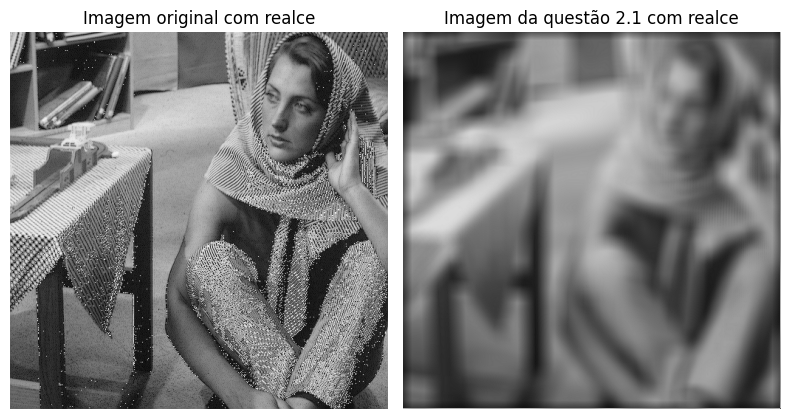

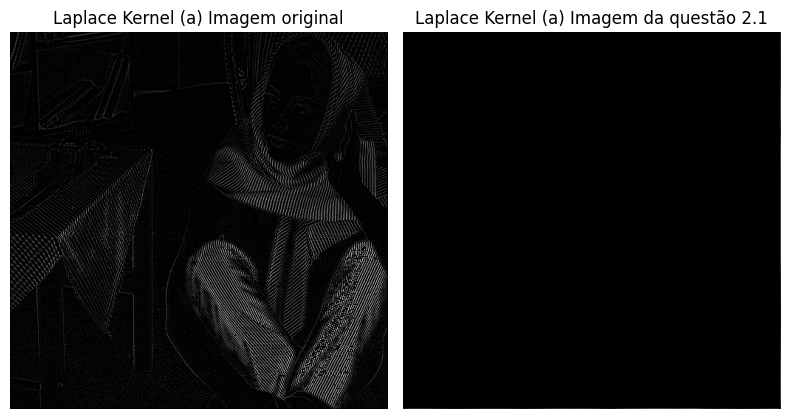

In [32]:
title1 = 'Imagem original com realce'
title2 = 'Imagem da questão 2.1 com realce'
printImage("./Questao2_2/Barbara/sharpened_barbara_kernel_a.png",
           title1, title2,
          "./Questao2_2/Barbara/sharpened_barbara_2_1_kernel_a.png")
########
title1 = 'Laplace Kernel (a) Imagem original'
title2 = 'Laplace Kernel (a) Imagem da questão 2.1'
printImage("./Questao2_2/Barbara/my_laplace_filter_barbara_kernel_a.png",
           title1, title2,
          "./Questao2_2/Barbara/my_laplace_filter_barbara_2_1_kernel_a.png")

Zelda

In [33]:
name_folder = 'Zelda'
_ = sharpenImage('./zelda.png', 'a', 'zelda', name_folder)
_ = sharpenImage('./Questao2_1/Zelda/median_filter_25x25_zelda.png', 'a', 
                 'zelda_2_1', name_folder)

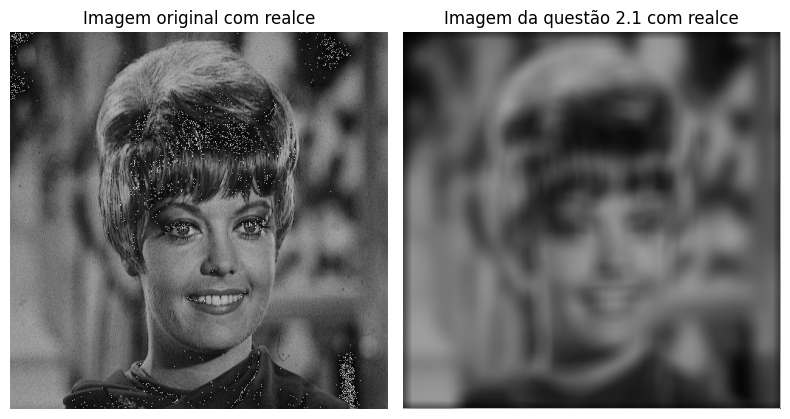

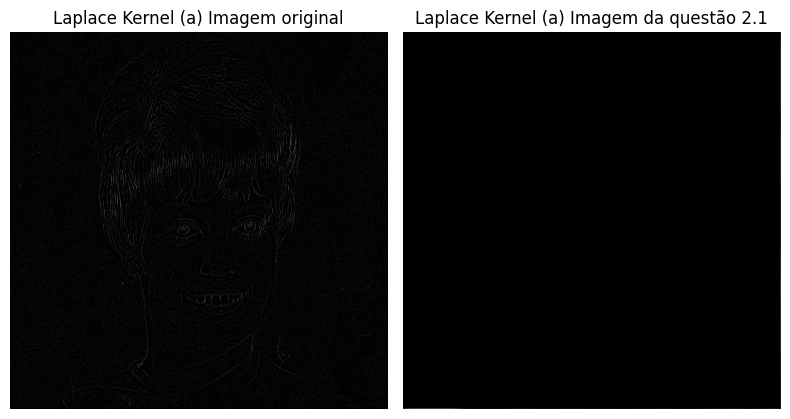

In [34]:
title1 = 'Imagem original com realce'
title2 = 'Imagem da questão 2.1 com realce'
printImage("./Questao2_2/Zelda/sharpened_zelda_kernel_a.png",
           title1, title2,
          "./Questao2_2/Zelda/sharpened_zelda_2_1_kernel_a.png")
########
title1 = 'Laplace Kernel (a) Imagem original'
title2 = 'Laplace Kernel (a) Imagem da questão 2.1'
printImage("./Questao2_2/Zelda/my_laplace_filter_zelda_kernel_a.png",
           title1, title2,
          "./Questao2_2/Zelda/my_laplace_filter_zelda_2_1_kernel_a.png")

Lena

In [35]:
name_folder = 'Lena'
_ = sharpenImage('./lena.bmp', 'a', 'lena', name_folder)
_ = sharpenImage('./Questao2_1/Lena/median_filter_25x25_lena.png', 'a', 
                 'lena_2_1', name_folder)

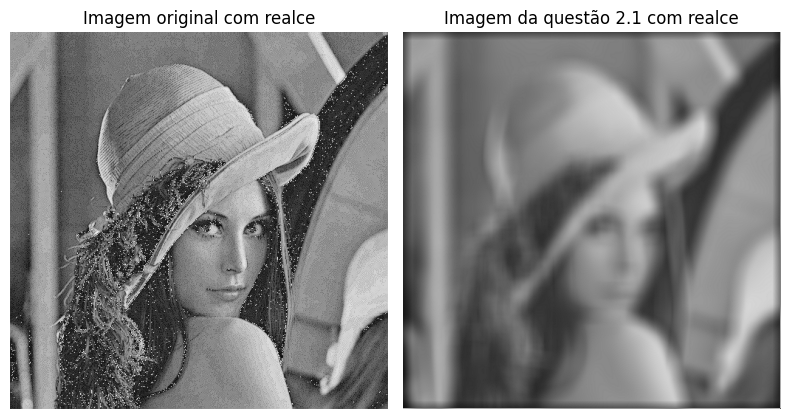

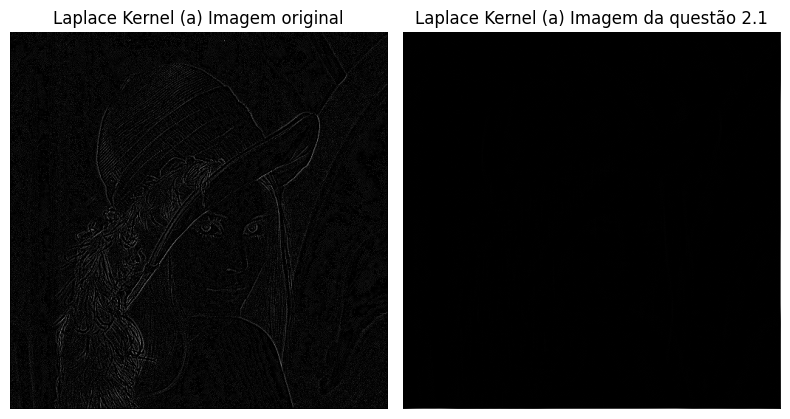

In [36]:
title1 = 'Imagem original com realce'
title2 = 'Imagem da questão 2.1 com realce'
printImage("./Questao2_2/Lena/sharpened_lena_kernel_a.png",
           title1, title2,
          "./Questao2_2/Lena/sharpened_lena_2_1_kernel_a.png")
########
title1 = 'Laplace Kernel (a) Imagem original'
title2 = 'Laplace Kernel (a) Imagem da questão 2.1'
printImage("./Questao2_2/Lena/my_laplace_filter_lena_kernel_a.png",
           title1, title2,
          "./Questao2_2/Lena/my_laplace_filter_lena_2_1_kernel_a.png")

**2.3**

> Utilize o seu programa de filtragem para implementar a técnica de máscara de nitidez (*unsharp masking*) e a técnica *high boost* vistas em sala de aula. Na implementação, utilize um filtro passa-baixas de sua escolha.

> Considerando as três imagens acima, teste o algoritmos para *k = 1* (máscara de nitidez) e para alguns valores de *k > 1*, comentando sobre os diversos resultados. 

> Qual o valor de *k* que gerou o resultado mais satisfatório  para cada uma das imagens?

In [37]:
try:
    criarDiretorio("Questao2_3")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_3/Barbara")
except:
    print('Diretório já foi criado')
    
try:
    criarDiretorio("./Questao2_3/Lena")
except:
    print('Diretório já foi criado')

try:
    criarDiretorio("./Questao2_3/Zelda")
except:
    print('Diretório já foi criado')

Diretório já foi criado
Diretório já foi criado
Diretório já foi criado
Diretório já foi criado


In [38]:
def lowGaussianFilter(path, window_size, name, name_folder, sigma):
    img = cv2.imread(path)
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        pass
    width, height = img.shape
    
    img_out = np.zeros(shape=(width, height), dtype='uint8')
    
    # janela
    arr = [i for i in range(-window_size, window_size+1)]
    win_x, win_y = np.meshgrid(arr, arr, sparse=False, indexing='ij')
    size_win_x = win_x.shape[0]
    size_win_y = win_y.shape[0]

    
    # Equações
    Exp_comp = -(np.power(win_x, 2)+np.power(win_y, 2))/(2*sigma*sigma)
    Kernel = np.exp(Exp_comp)/(2*np.pi*sigma*sigma)
    
    img = np.pad(img, [window_size, window_size])
    for i in range(img.shape[0] - size_win_x):
        for j in range(img.shape[1] - size_win_y):
            temp = img[i:i+size_win_x, j:j+size_win_x]*Kernel
            res = sum(sum(temp[:]))
            img_out[i, j] = res
            
    img_out = img_out.astype(np.uint8)
    cv2.imwrite('./Questao2_3/{}/gaussian_{}_kernel_{}.png'.format(
                name_folder,
                name, window_size), 
                img_out)
    
    ### Salvar imagem OpenCV
    image_gaussian_processed_opencv = cv2.GaussianBlur(img,(window_size, window_size),
                                                       cv2.BORDER_DEFAULT)
    
    return img_out


#### Filtros gaussianos para cada imagem

Barbara

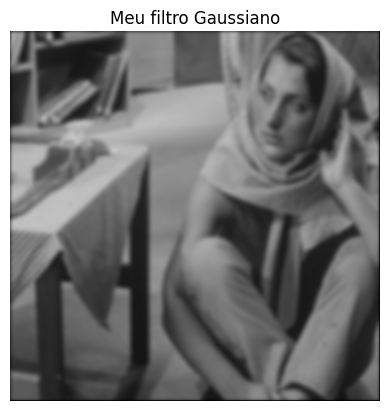

In [39]:
name = 'barbara'
name_folder = 'Barbara'
path = './barbara.png'
window_size = 5
title1 = 'Meu filtro Gaussiano'
title2 = 'Filtro Gaussiano OpenCV'
sigma = 3

_ = lowGaussianFilter(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/gaussian_{}_kernel_{}.png'.format(
                name_folder,
                name, window_size),
           title1)

Zelda

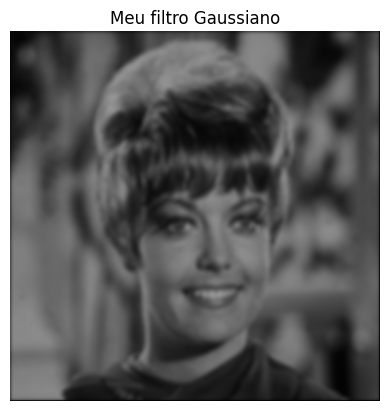

In [40]:
name = 'zelda'
name_folder = 'Zelda'
path = './zelda.png'
window_size = 5
title1 = 'Meu filtro Gaussiano'
title2 = 'Filtro Gaussiano OpenCV'
sigma = 3

_ = lowGaussianFilter(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/gaussian_{}_kernel_{}.png'.format(
                name_folder,
                name, window_size),
           title1)

Lena

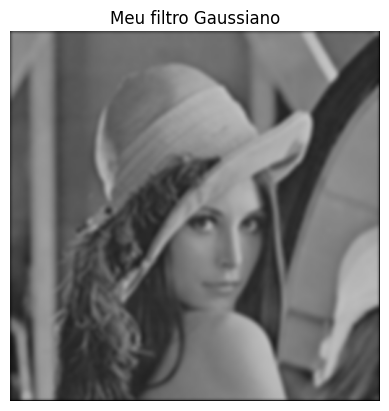

In [41]:
name = 'lena'
name_folder = 'Lena'
path = './lena.bmp'
window_size = 5
title1 = 'Meu filtro Gaussiano'
title2 = 'Filtro Gaussiano OpenCV'
sigma = 3

_ = lowGaussianFilter(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/gaussian_{}_kernel_{}.png'.format(
                name_folder,
                name, window_size),
           title1)

Unsharp Masking

In [42]:
def unsharp(path, window_size, name, name_folder, sigma):
    img = cv2.imread(path)
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        pass
    width, height = img.shape
    
    img_out = np.zeros(shape=(width, height), dtype='uint8')
    
    gaussian = lowGaussianFilter(path, window_size, name, name_folder, sigma)

    img_out = img - gaussian
    img_out = img_out.astype(np.uint8)
            
    cv2.imwrite('./Questao2_3/{}/mask_{}.png'.format(
                name_folder,
                name), 
                img_out)
    return img_out

Barbara

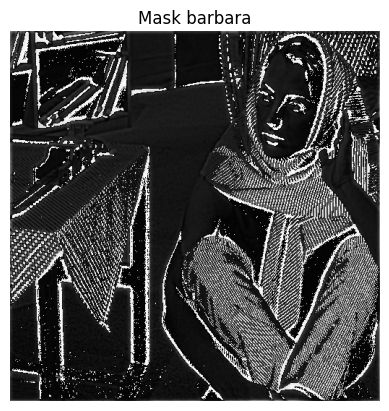

In [43]:
name = 'barbara'
name_folder = 'Barbara'
path = './barbara.png'
window_size = 5
sigma = 3
title1 = 'Mask ' + name

_ = unsharp(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/mask_{}.png'.format(
                name_folder,
                name),
           title1)

Zelda

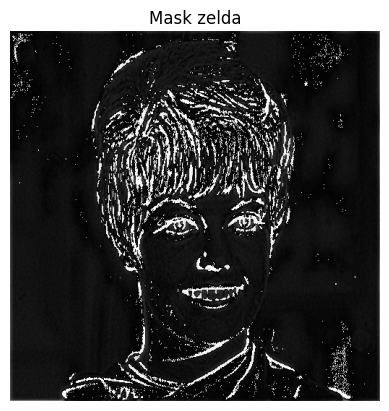

In [44]:
name = 'zelda'
name_folder = 'Zelda'
path = './zelda.png'
window_size = 5
sigma = 3
title1 = 'Mask ' + name

_ = unsharp(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/mask_{}.png'.format(
                name_folder,
                name),
           title1)

Lena

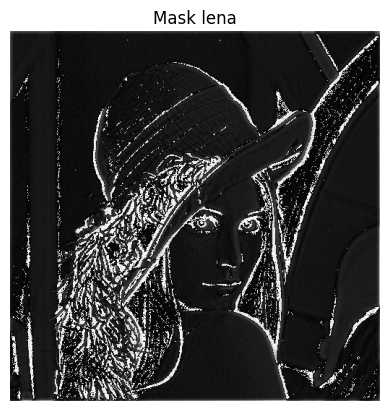

In [45]:
name = 'lena'
name_folder = 'Lena'
path = './lena.bmp'
window_size = 5
sigma = 3
title1 = 'Mask ' + name

_ = unsharp(path, window_size, name, name_folder, sigma)
printImage('./Questao2_3/{}/mask_{}.png'.format(
                name_folder,
                name),
           title1)

In [46]:
def highboost(path, window_size, name, name_folder, sigma, k):
    img = cv2.imread(path)
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        pass
    width, height = img.shape
    
    img_out = np.zeros(shape=(width, height), dtype='uint8')
    
    unsharp_arr = unsharp(path, window_size, name, name_folder, sigma)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res = img[i, j] + k*unsharp_arr[i, j]
            img_out[i, j] = res
    
    img_out = img_out.astype(np.uint8)
    cv2.imwrite('./Questao2_3/{}/unsharp_k_{}_{}.png'.format(
                name_folder,
                k,
                name), 
                img_out)
    return img_out

Barbara

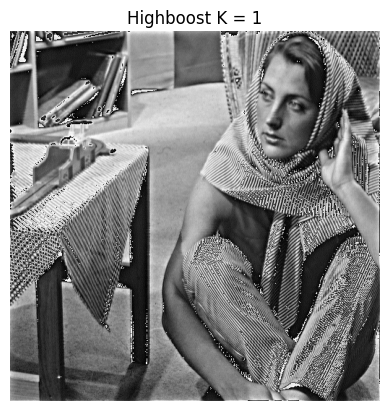

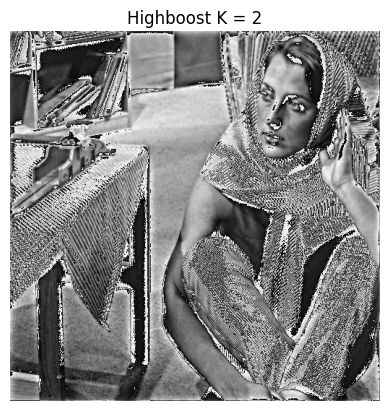

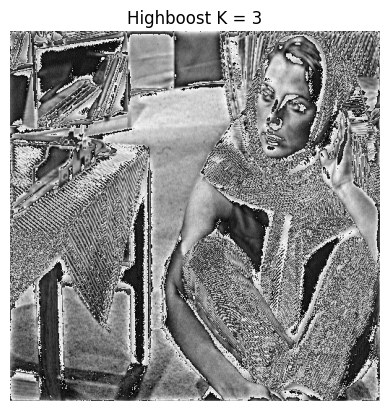

In [47]:
name = 'barbara'
name_folder = 'Barbara'
path = './barbara.png'
window_size = 31
sigma = 5
for k in range(1, 4):
    title1 = 'Highboost K = ' + str(k)
    _ = highboost(path, window_size, name, name_folder, sigma, k)
    printImage('./Questao2_3/{}/unsharp_k_{}_{}.png'.format(
                    name_folder,
                    k,
                    name),
               title1)

Zelda

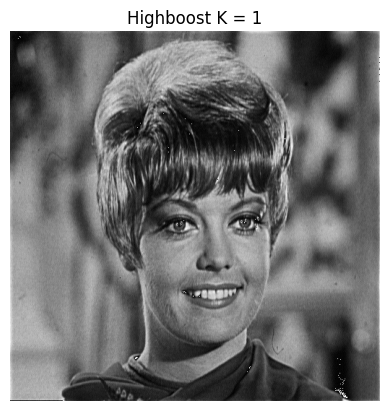

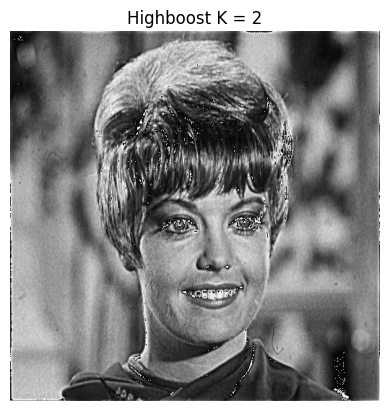

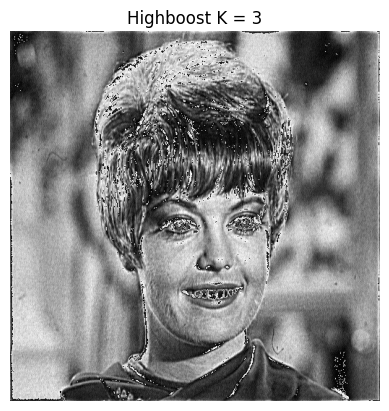

In [48]:
name = 'zelda'
name_folder = 'Zelda'
path = './zelda.png'
window_size = 5
sigma = 3
for k in range(1, 4):
    title1 = 'Highboost K = ' + str(k)
    _ = highboost(path, window_size, name, name_folder, sigma, k)
    printImage('./Questao2_3/{}/unsharp_k_{}_{}.png'.format(
                    name_folder,
                    k,
                    name),
               title1)

Lena

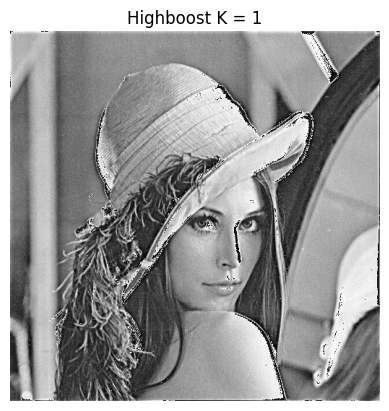

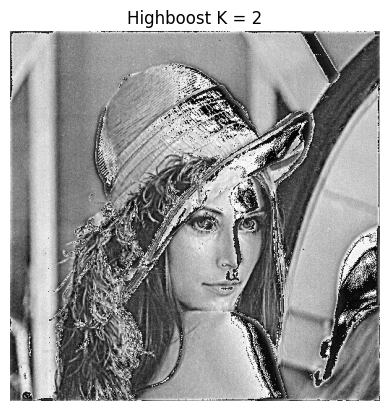

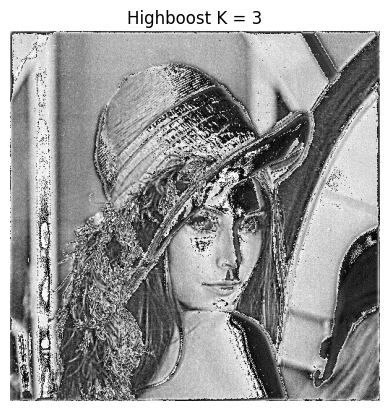

In [49]:
name = 'lena'
name_folder = 'Lena'
path = './lena.bmp'
window_size = 5
sigma = 3
for k in range(1, 4):
    title1 = 'Highboost K = ' + str(k)
    _ = highboost(path, window_size, name, name_folder, sigma, k)
    printImage('./Questao2_3/{}/unsharp_k_{}_{}.png'.format(
                    name_folder,
                    k,
                    name),
               title1)

Logo, a resposta para o questionamento de qual valor de K é melhor é - depende. Dado que o valor de k podemos ter uma distorção da imagem. Assim, pode-se dizer que o melhor valor de K seria aquele que deixasse a imagem nítida e não tivesse ou evidenciasse ruído. 